# Import libaries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import statsmodels.api as sm
from datetime import datetime
from sklearn import preprocessing 
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

In [2]:
# load dataset
dataset = pd.read_csv("rideshare_data.csv")

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           693071 non-null  object 
 1   timestamp                    693071 non-null  float64
 2   hour                         693071 non-null  int64  
 3   day                          693071 non-null  int64  
 4   month                        693071 non-null  int64  
 5   datetime                     693071 non-null  object 
 6   timezone                     693071 non-null  object 
 7   source                       693071 non-null  object 
 8   destination                  693071 non-null  object 
 9   cab_type                     693071 non-null  object 
 10  product_id                   693071 non-null  object 
 11  name                         693071 non-null  object 
 12  price                        637976 non-null  float64
 13 

In [4]:
dataset.describe()

,timestamp,hour,day,month,price,distance,surge_multiplier,latitude,longitude,temperature,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
count,6.930710e+05,693071.000000,693071.000000,693071.000000,637976.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,...,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05
mean,1.544046e+09,11.619137,17.794365,11.586684,16.545125,2.189430,1.013870,42.338172,-71.066151,39.584388,...,0.037374,1.544044e+09,33.457774,1.544042e+09,45.261313,1.544047e+09,29.731002,1.544048e+09,41.997343,1.544048e+09
std,6.891925e+05,6.948114,9.982286,0.492429,9.324359,1.138937,0.091641,0.047840,0.020302,6.726084,...,0.055214,6.912028e+05,6.467224,6.901954e+05,5.645046,6.901353e+05,7.110494,6.871862e+05,6.936841,6.910777e+05
min,1.543204e+09,0.000000,1.000000,11.000000,2.500000,0.020000,1.000000,42.214800,-71.105400,18.910000,...,0.000000,1.543162e+09,15.630000,1.543122e+09,33.510000,1.543154e+09,11.810000,1.543136e+09,28.950000,1.543187e+09
25%,1.543444e+09,6.000000,13.000000,11.000000,9.000000,1.280000,1.000000,42.350300,-71.081000,36.450000,...,0.000000,1.543421e+09,30.170000,1.543399e+09,42.570000,1.543439e+09,27.760000,1.543399e+09,36.570000,1.543439e+09
50%,1.543737e+09,12.000000,17.000000,12.000000,13.500000,2.160000,1.000000,42.351900,-71.063100,40.490000,...,0.000400,1.543770e+09,34.240000,1.543727e+09,44.680000,1.543788e+09,30.130000,1.543745e+09,40.950000,1.543788e+09
75%,1.544828e+09,18.000000,28.000000,12.000000,22.500000,2.920000,1.000000,42.364700,-71.054200,43.580000,...,0.091600,1.544807e+09,38.880000,1.544789e+09,46.910000,1.544814e+09,35.710000,1.544789e+09,44.120000,1.544818e+09
max,1.545161e+09,23.000000,30.000000,12.000000,97.500000,7.860000,3.000000,42.366100,-71.033000,57.220000,...,0.145900,1.545152e+09,43.100000,1.545192e+09,57.870000,1.545109e+09,40.050000,1.545134e+09,57.200000,1.545109e+09


In [5]:
dataset.shape

(693071, 57)

In [6]:
dataset.head(15)

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,...,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,...,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,...,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,...,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,...,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800
5,f6f6d7e4-3e18-4922-a5f5-181cdd3fa6f2,1.545071e+09,18,17,12,2018-12-17 18:25:12,America/New_York,Haymarket Square,North Station,Lyft,...,0.0221,1545066000,34.19,1545048000,40.66,1545022800,27.39,1545044400,34.97,1545080400
6,462816a3-820d-408b-8549-0b39e82f65ac,1.543209e+09,5,26,11,2018-11-26 05:03:00,America/New_York,Back Bay,Northeastern University,Lyft,...,0.1245,1543251600,40.67,1543233600,46.46,1543255200,37.45,1543291200,43.81,1543251600
7,474d6376-bc59-4ec9-bf57-4e6d6faeb165,1.543780e+09,19,2,12,2018-12-02 19:53:04,America/New_York,Back Bay,Northeastern University,Lyft,...,0.0916,1543770000,36.32,1543726800,50.80,1543788000,35.84,1543748400,50.13,1543788000
8,4f9fee41-fde3-4767-bbf1-a00e108701fb,1.543818e+09,6,3,12,2018-12-03 06:28:02,America/New_York,Back Bay,Northeastern University,Lyft,...,0.0004,1543852800,43.09,1543896000,57.02,1543852800,39.90,1543896000,56.35,1543852800
9,8612d909-98b8-4454-a093-30bd48de0cb3,1.543316e+09,10,27,11,2018-11-27 10:45:22,America/New_York,Back Bay,Northeastern University,Lyft,...,0.1425,1543338000,36.34,1543377600,46.91,1543320000,32.43,1543377600,44.01,1543320000


<AxesSubplot:xlabel='price', ylabel='name'>

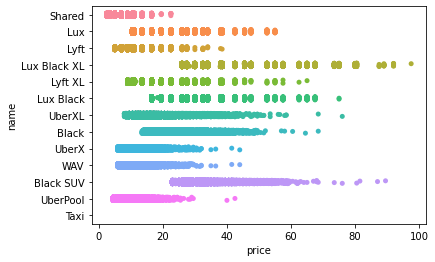

In [7]:
sns.stripplot(data=dataset, x='price', y='name')

<AxesSubplot:xlabel='price', ylabel='icon'>

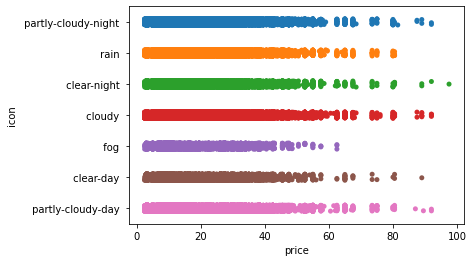

In [8]:
sns.stripplot(data=dataset, x='price', y='icon')

<AxesSubplot:xlabel='surge_multiplier', ylabel='destination'>

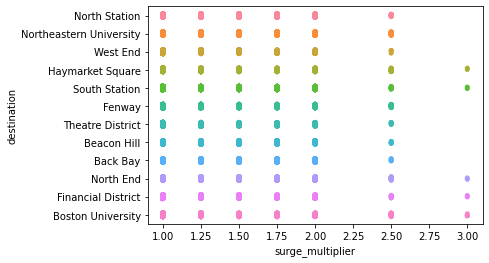

In [9]:
sns.stripplot(data=dataset, x='surge_multiplier', y='destination')

<AxesSubplot:>

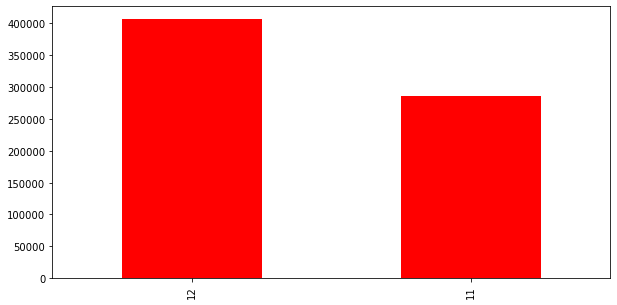

In [10]:
dataset['month'].value_counts().plot(kind='bar', figsize=(10,5), color='red')

<AxesSubplot:>

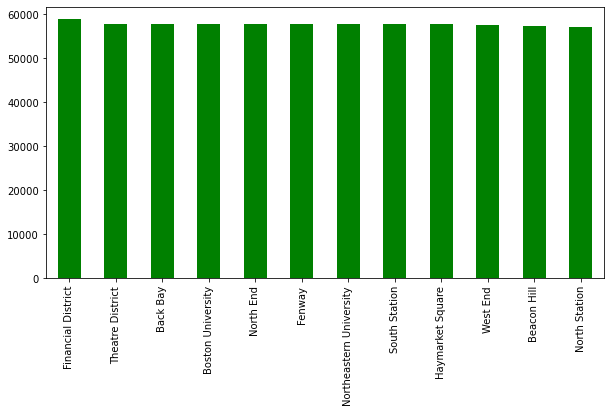

In [11]:
dataset['source'].value_counts().plot(kind='bar', figsize=(10,5), color='green')

<AxesSubplot:>

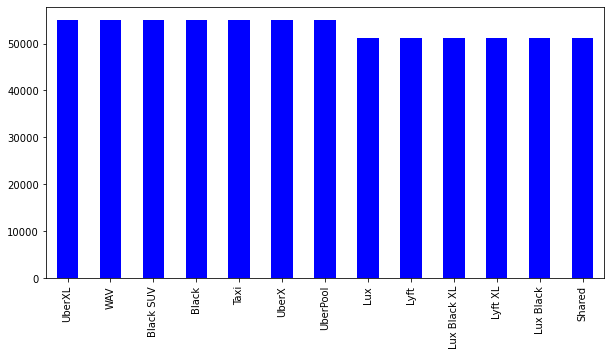

In [12]:
dataset['name'].value_counts().plot(kind='bar', figsize=(10,5), color='blue')

<AxesSubplot:>

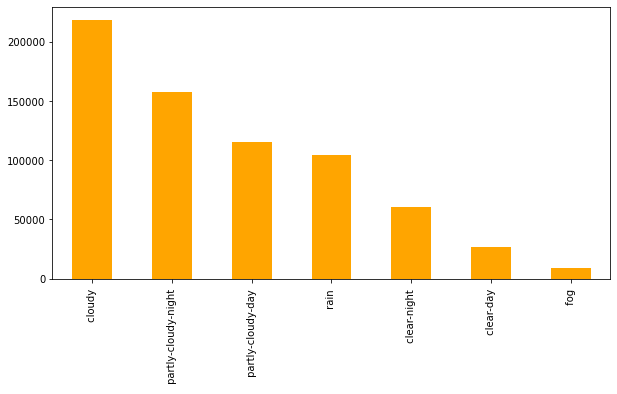

In [13]:
dataset['icon'].value_counts().plot(kind='bar', figsize=(10,5), color='orange')

<AxesSubplot:>

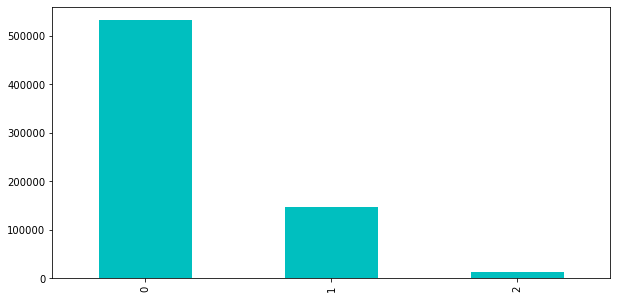

In [14]:
dataset['uvIndex'].value_counts().plot(kind='bar', figsize=(10,5), color='c')

<AxesSubplot:>

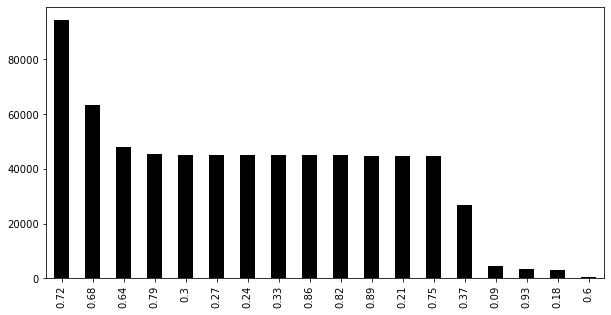

In [15]:
dataset['moonPhase'].value_counts().plot(kind='bar', figsize=(10,5), color='k')

<AxesSubplot:>

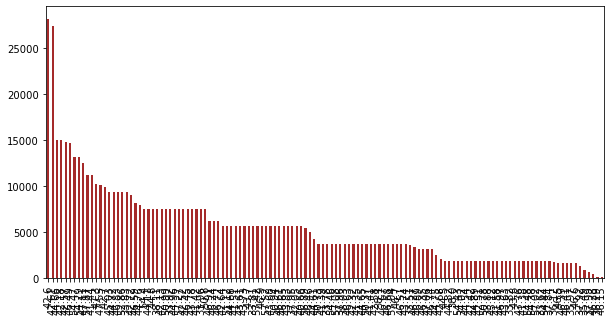

In [16]:
dataset['temperatureMax'].value_counts().plot(kind='bar', figsize=(10,5), color='brown')

In [17]:
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 

In [18]:
# Encode target labels with value between 0 and n_classes-1.
dataset['id']= label_encoder.fit_transform(dataset['id']) 
dataset['datetime']= label_encoder.fit_transform(dataset['datetime']) 
dataset['timezone']= label_encoder.fit_transform(dataset['timezone'])
dataset['destination']= label_encoder.fit_transform(dataset['destination']) 
dataset['product_id']= label_encoder.fit_transform(dataset['product_id'])
dataset['short_summary']= label_encoder.fit_transform(dataset['short_summary'])
dataset['long_summary']= label_encoder.fit_transform(dataset['long_summary'])
dataset['name']= label_encoder.fit_transform(dataset['name'])
dataset['source']= label_encoder.fit_transform(dataset['source'])
dataset['icon']= label_encoder.fit_transform(dataset['icon'])

In [19]:
print("Class mapping of Name: ")
for i, item in enumerate(label_encoder.classes_):
    print(item, "-->", i)

Class mapping of Name: 
 clear-day  --> 0
 clear-night  --> 1
 cloudy  --> 2
 fog  --> 3
 partly-cloudy-day  --> 4
 partly-cloudy-night  --> 5
 rain  --> 6


In [20]:
print("Class mapping of Source: ")
for i, item in enumerate(label_encoder.classes_):
    print(item, "-->", i)

Class mapping of Source: 
 clear-day  --> 0
 clear-night  --> 1
 cloudy  --> 2
 fog  --> 3
 partly-cloudy-day  --> 4
 partly-cloudy-night  --> 5
 rain  --> 6


In [21]:
print("Class mapping of Icon: ")
for i, item in enumerate(label_encoder.classes_):
    print(item, "-->", i)

Class mapping of Icon: 
 clear-day  --> 0
 clear-night  --> 1
 cloudy  --> 2
 fog  --> 3
 partly-cloudy-day  --> 4
 partly-cloudy-night  --> 5
 rain  --> 6


In [22]:
dataset['surge_multiplier']= label_encoder.fit_transform(dataset['surge_multiplier'])

In [23]:
dataset.dtypes

id                               int32
timestamp                      float64
hour                             int64
day                              int64
month                            int64
datetime                         int32
timezone                         int32
source                           int32
destination                      int32
cab_type                        object
product_id                       int32
name                             int32
price                          float64
distance                       float64
surge_multiplier                 int64
latitude                       float64
longitude                      float64
temperature                    float64
apparentTemperature            float64
short_summary                    int32
long_summary                     int32
precipIntensity                float64
precipProbability              float64
humidity                       float64
windSpeed                      float64
windGust                 

## Missing data handling
* By counting all missing data, it can be seen in which colum the data are missing
* Find the median of the concerned column
* Fill missing data by the median of the column

In [24]:
# count the number of missing data
dataset.isnull().sum()

id                                 0
timestamp                          0
hour                               0
day                                0
month                              0
datetime                           0
timezone                           0
source                             0
destination                        0
cab_type                           0
product_id                         0
name                               0
price                          55095
distance                           0
surge_multiplier                   0
latitude                           0
longitude                          0
temperature                        0
apparentTemperature                0
short_summary                      0
long_summary                       0
precipIntensity                    0
precipProbability                  0
humidity                           0
windSpeed                          0
windGust                           0
windGustTime                       0
v

In [25]:
median = dataset['price'].median()
print(median)

13.5


In [26]:
# Fill missing data with the median
dataset["price"].fillna(median, inplace = True) 

In [27]:
dataset.isnull().sum()

id                             0
timestamp                      0
hour                           0
day                            0
month                          0
datetime                       0
timezone                       0
source                         0
destination                    0
cab_type                       0
product_id                     0
name                           0
price                          0
distance                       0
surge_multiplier               0
latitude                       0
longitude                      0
temperature                    0
apparentTemperature            0
short_summary                  0
long_summary                   0
precipIntensity                0
precipProbability              0
humidity                       0
windSpeed                      0
windGust                       0
windGustTime                   0
visibility                     0
temperatureHigh                0
temperatureHighTime            0
temperatur

## Features selection

### Filter method
As the name suggest, in this method, you filter and take only the subset of the relevant features. The model is built after selecting the features. The filtering here is done using correlation matrix and it is most commonly done using Pearson correlation.

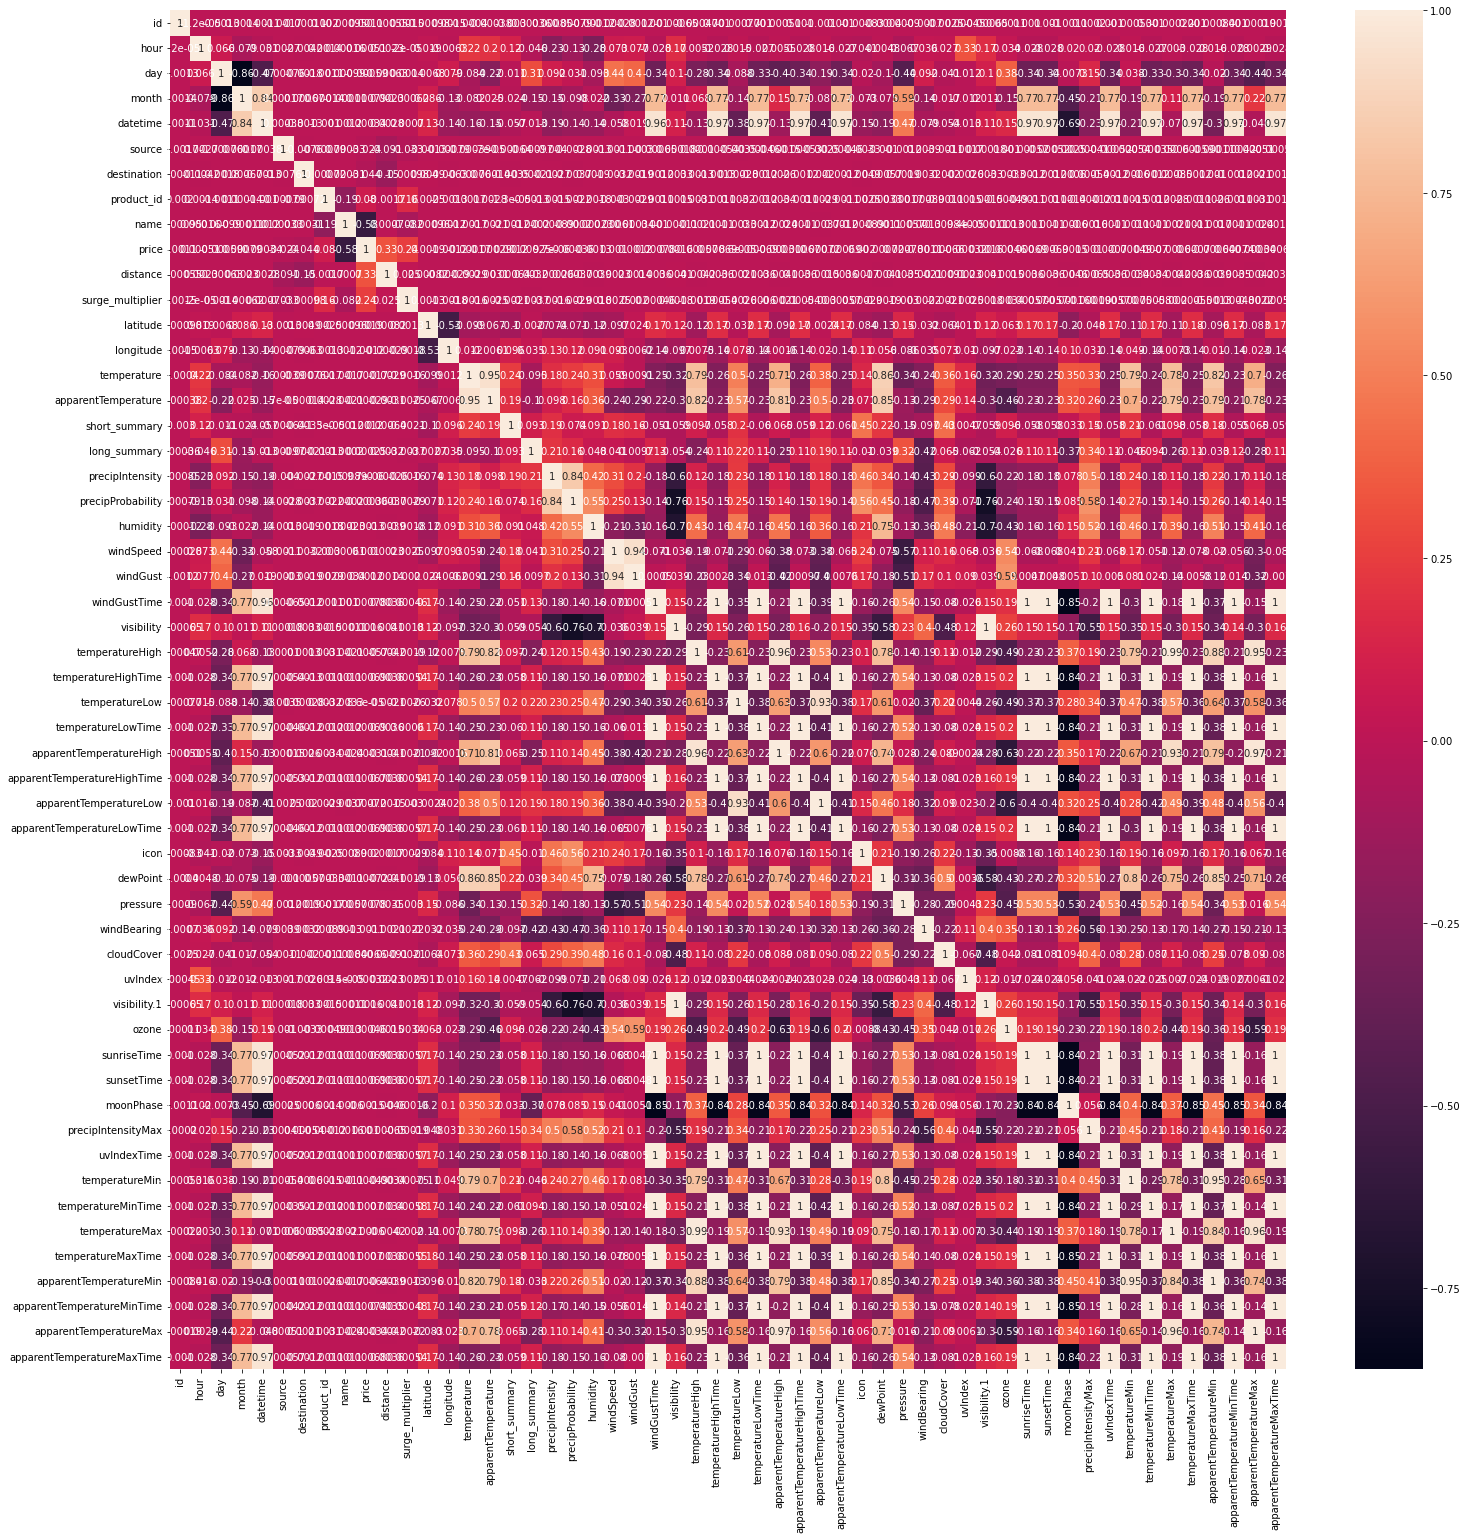

In [28]:
#Using Pearson Correlation
def compute_correlations_matrix_with_seaborn_visualization(data):
    cor=data.corr()
    plt.subplots(figsize=(25,25))
    sns.heatmap(cor,annot=True)
    
data = dataset.drop(['timezone', 'cab_type', 'timestamp'], axis= 1)
compute_correlations_matrix_with_seaborn_visualization(data)

In [29]:
# create an input x and an output y
X = data.drop('price', axis = 1) #Feature Matrix
y = data['price'] #Target Variable

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [31]:
X_train.shape

(554456, 53)

In [32]:
X_test.shape

(138615, 53)

In [33]:
y_train.shape

(554456,)

In [34]:
y_test.shape

(138615,)

In [35]:
#Correlation with output variable
cor=data.corr()
cor_target = abs(cor['price'])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.005]
relevant_features

source              0.024257
destination         0.044272
product_id          0.080350
name                0.583843
price               1.000000
distance            0.328601
surge_multiplier    0.244752
Name: price, dtype: float64

As we can see, only the feature source, destination, product_id, name, distance and surge_multiplier are correlation obove 0.005 with the output variable.
However this is not the end of the process. One of the assumptions of linear regression is that the independent variables need to be uncorrelated with each other. If these variables are correlated with each other, then we need to keep only one of them and drop the rest. 

### Wrapper method
A wrapper method needs one machine learning algorithm and uses its performance as evaluation criteria. This means, you feed the features to the selected Machine Learning algorithm and based on the model performance you add/remove the features. This is an iterative and computationally expensive process but it is more accurate than the filter method.

In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 54 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           693071 non-null  int32  
 1   hour                         693071 non-null  int64  
 2   day                          693071 non-null  int64  
 3   month                        693071 non-null  int64  
 4   datetime                     693071 non-null  int32  
 5   source                       693071 non-null  int32  
 6   destination                  693071 non-null  int32  
 7   product_id                   693071 non-null  int32  
 8   name                         693071 non-null  int32  
 9   price                        693071 non-null  float64
 10  distance                     693071 non-null  float64
 11  surge_multiplier             693071 non-null  int64  
 12  latitude                     693071 non-null  float64
 13 

#### Backward Elimination

In [37]:
#Adding constant column of ones, mandatory for sm.OLS model
X_1 = sm.add_constant(X)
#Fitting sm.OLS model
model = sm.OLS(y,X_1).fit()
model.pvalues

const                          7.992831e-01
id                             5.246358e-01
hour                           6.638540e-01
day                            7.911908e-01
month                          7.691307e-01
datetime                       6.055501e-01
source                         5.599233e-45
destination                    1.919268e-06
product_id                     0.000000e+00
name                           0.000000e+00
distance                       0.000000e+00
surge_multiplier               0.000000e+00
latitude                       3.055229e-01
longitude                      1.182545e-01
temperature                    8.854608e-01
apparentTemperature            7.862447e-01
short_summary                  6.092710e-01
long_summary                   7.920046e-01
precipIntensity                8.301810e-01
precipProbability              7.472013e-01
humidity                       9.416545e-01
windSpeed                      3.114159e-01
windGust                       2

In [38]:
#Backward Elimination
cols = list(X.columns)
pmax = 1
while (len(cols)>0):
    p= []
    X_1 = X[cols]
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(y,X_1).fit()
    p = pd.Series(model.pvalues.values[1:],index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features_BE = cols
print(selected_features_BE)

['source', 'destination', 'product_id', 'name', 'distance', 'surge_multiplier']


In [39]:
model = LinearRegression()
#Initializing RFE model
rfe = RFE(model)
#Transforming data using RFE
X_rfe = rfe.fit_transform(X,y)  
#Fitting the data to model
model.fit(X_rfe,y)
print(rfe.support_)
print(rfe.ranking_)

[False False  True  True False  True  True  True  True  True  True  True
  True  True False False False  True  True  True  True False False False
  True False  True False  True False  True False False  True False False
  True False False False False False  True  True False False False  True
 False  True False  True False]
[28 13  1  1 17  1  1  1  1  1  1  1  1  1  4  8  7  1  1  1  1  2 23  9
  1 27  1 25  1 18  1 22  3  1  6 20  1 11 12 10 14 15  1  1 16  5 24  1
 21  1 26  1 19]


In [40]:
#Creating model
reg1 = LinearRegression()
#Fitting training data
reg1 = reg1.fit(X_train, y_train)
#Y prediction
Y_pred = reg1.predict(X_test)

In [41]:
reg1.score(X_train, y_train)

0.4888342574966815

### RFE (Recursive Feature Elimination)

In [42]:
cols = list(X.columns)
model = LinearRegression()
#Initializing RFE model
rfe = RFE(model)             
#Transforming data using RFE
X_rfe = rfe.fit_transform(X,y)  
#Fitting the data to model
model.fit(X_rfe,y)              
temp = pd.Series(rfe.support_,index = cols)
selected_features_rfe = temp[temp==True].index
print(selected_features_rfe)

Index(['day', 'month', 'source', 'destination', 'product_id', 'name',
       'distance', 'surge_multiplier', 'latitude', 'longitude', 'temperature',
       'precipIntensity', 'precipProbability', 'humidity', 'windSpeed',
       'temperatureHigh', 'temperatureLow', 'apparentTemperatureHigh',
       'apparentTemperatureLow', 'dewPoint', 'cloudCover', 'moonPhase',
       'precipIntensityMax', 'temperatureMax', 'apparentTemperatureMin',
       'apparentTemperatureMax'],
      dtype='object')


<AxesSubplot:>

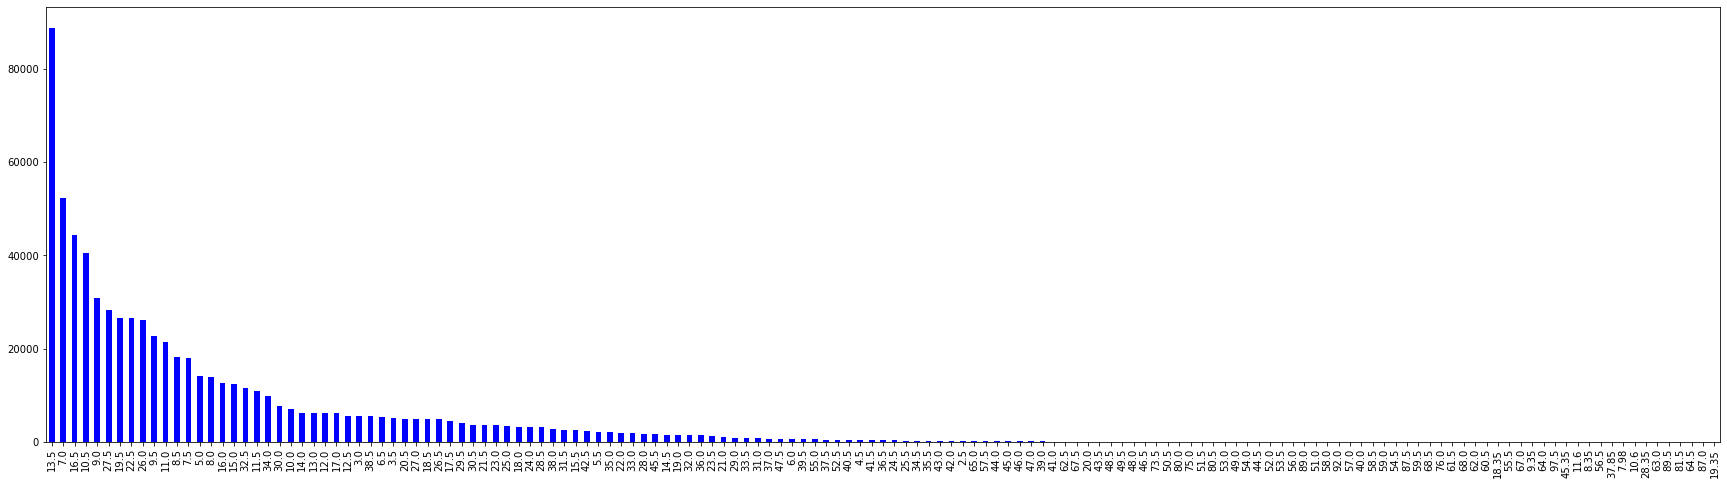

In [43]:
y.value_counts().plot(kind='bar',figsize=(30,8),color='blue')

### Drop useless features

In [44]:
features_drop = ['month','latitude', 'longitude', 'apparentTemperature',
       'long_summary', 'precipIntensity', 'humidity', 'windSpeed', 'windGust',
       'temperatureHigh', 'apparentTemperatureHigh','icon', 'dewPoint','precipIntensityMax',
       'temperatureMax', 'apparentTemperatureMax', 'cloudCover', 'moonPhase', 'uvIndex']
new_data = X.drop(features_drop, axis=1)

In [45]:
new_data = X.loc[:, ['month','source', 'destination', 'product_id', 'name', 'distance', 'surge_multiplier','icon']]
#new_data = X.loc[:, ['source', 'destination', 'product_id', 'name', 'distance', 'surge_multiplier']]

In [46]:
new_data.head()

,month,source,destination,product_id,name,distance,surge_multiplier,icon
0,12,5,7,8,7,0.44,0,5
1,11,5,7,12,2,0.44,0,6
2,11,5,7,7,5,0.44,0,1
3,11,5,7,10,4,0.44,0,1
4,11,5,7,11,6,0.44,0,5


In [47]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   month             693071 non-null  int64  
 1   source            693071 non-null  int32  
 2   destination       693071 non-null  int32  
 3   product_id        693071 non-null  int32  
 4   name              693071 non-null  int32  
 5   distance          693071 non-null  float64
 6   surge_multiplier  693071 non-null  int64  
 7   icon              693071 non-null  int32  
dtypes: float64(1), int32(5), int64(2)
memory usage: 29.1 MB


### Binning

In [48]:
# surge_multiplier_mapping = {1.: 0, 1.25: 1, 1.5: 2, 1.75: 3, 2.:4}
# new_data['surge_multiplier'] = new_data['surge_multiplier'].map(surge_multiplier_mapping)

### Final dataset

In [49]:
new_data.head()

,month,source,destination,product_id,name,distance,surge_multiplier,icon
0,12,5,7,8,7,0.44,0,5
1,11,5,7,12,2,0.44,0,6
2,11,5,7,7,5,0.44,0,1
3,11,5,7,10,4,0.44,0,1
4,11,5,7,11,6,0.44,0,5


In [50]:
#new_data['distance'] = pd.to_numeric(new_data['distance'], errors = 'coerce')
new_data['distance'] = (new_data['distance']*1000).astype('int64')

In [51]:
new_data.head()

,month,source,destination,product_id,name,distance,surge_multiplier,icon
0,12,5,7,8,7,440,0,5
1,11,5,7,12,2,440,0,6
2,11,5,7,7,5,440,0,1
3,11,5,7,10,4,440,0,1
4,11,5,7,11,6,440,0,5


In [52]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype
---  ------            --------------   -----
 0   month             693071 non-null  int64
 1   source            693071 non-null  int32
 2   destination       693071 non-null  int32
 3   product_id        693071 non-null  int32
 4   name              693071 non-null  int32
 5   distance          693071 non-null  int64
 6   surge_multiplier  693071 non-null  int64
 7   icon              693071 non-null  int32
dtypes: int32(5), int64(3)
memory usage: 29.1 MB


## Modeling

In [53]:
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(new_data, y, test_size = 0.2, random_state = 42)

In [54]:
x_train.shape

(554456, 8)

In [55]:
x_test.shape

(138615, 8)

In [56]:
y_train.shape

(554456,)

In [57]:
y_test.shape

(138615,)

### Model
The following model will be used for modeling
* Linear Regression
* Decision Tree
* Random Forest
* Gradient Boosting Regressor

### Linear Regression

In [58]:
linear = LinearRegression()
linear.fit(x_train, y_train)
linear.score(x_test, y_test)

0.4865047841007797

### Decision Tree

In [59]:
decision = DecisionTreeRegressor(random_state = 0)  
decision.fit(x_train , y_train) 
decision.score(x_test, y_test)

0.9616540568341782

### Random Forest

In [60]:
random = RandomForestRegressor(n_estimators = 100, random_state = 0) 
random.fit(x_train , y_train)  
random.score(x_test, y_test)

0.965895245314865

### Gradient Boosting Regressor

In [61]:
clf = GradientBoostingRegressor(n_estimators = 400, max_depth = 5)
clf.fit(x_train, y_train)
clf.score(x_test, y_test)

0.9684942138504185

In [62]:
models = {"LinearRegression": LinearRegression(),"DecisionTreeRegressor": DecisionTreeRegressor(random_state = 0),
          "RandomForestRegressor": RandomForestRegressor(n_estimators = 100, random_state = 0),
          "GradientBoostingRegressor": GradientBoostingRegressor(n_estimators = 400, max_depth = 5)}
print("Models accuracy:")
for key, model in models.items():
    model.fit(x_train, y_train)
    Y_pred = model.predict(x_test)
    print(f"{key:}: {round(model.score(x_test, y_test)*100, 2)}%")

Models accuracy:
LinearRegression: 48.65%
DecisionTreeRegressor: 96.17%
RandomForestRegressor: 96.59%
GradientBoostingRegressor: 96.85%


### K-fold Cross validation

In [63]:
cv=ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
cross_val_score(LinearRegression(),x_test,y_test,cv=cv)

array([0.49059435, 0.48906095, 0.48709761, 0.48258475, 0.4832971 ])

In [64]:
cv=ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
cross_val_score(DecisionTreeRegressor(random_state = 0),x_test,y_test,cv=cv)

array([0.94946143, 0.95174007, 0.95264107, 0.95201453, 0.95068688])

In [65]:
cv=ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
cross_val_score(RandomForestRegressor(n_estimators = 100, random_state = 0),x_test,y_test,cv=cv)

array([0.96081652, 0.96224437, 0.96260495, 0.96199388, 0.96044678])

In [66]:
cv=ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
cross_val_score(GradientBoostingRegressor(n_estimators = 400, max_depth = 5),x_test,y_test,cv=cv)

array([0.96633506, 0.96844833, 0.96862436, 0.96805463, 0.96603034])

## Testing

### Linear regrassion

In [67]:
prediction = linear.predict(x_test)
prediction

array([10.77971526, 14.94546087, 11.31295463, ...,  8.88660854,
       15.02623343, 23.37241473])

In [68]:
prediction=  prediction.astype(int)
print('MAE :'," ", mean_absolute_error(y_test,prediction))
print('MSE :'," ", mean_squared_error(y_test,prediction))
print('RMAE :'," ", np.sqrt(mean_squared_error(y_test,prediction)))

MAE :   5.042368430545035
MSE :   41.786635320852724
RMAE :   6.4642582962666895


C:\Users\HBK\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

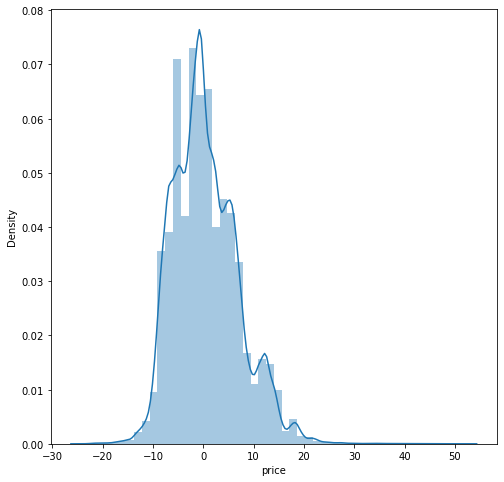

In [69]:
plt.subplots(figsize=(8,8))
sns.distplot(y_test - prediction,bins=50)

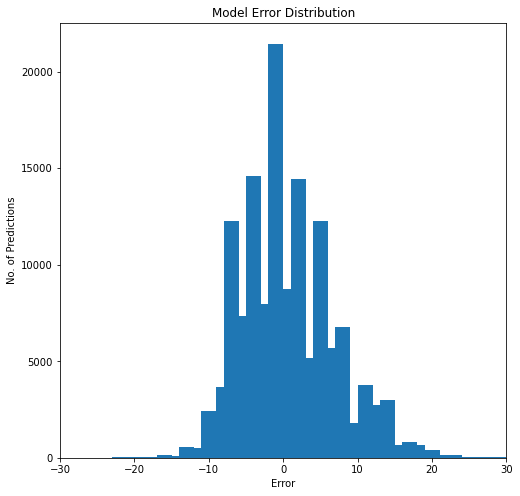

In [70]:
error = y_test - prediction
#Set plot size
plt.subplots(figsize=(8,8))
#Set X-Axis range
plt.xlim(-30, 30)
plt.title('Model Error Distribution')
plt.ylabel('No. of Predictions')
plt.xlabel('Error')
plt.hist(error, bins=np.linspace(-30, 30, num=41, dtype=int));
plt.show()

### Random Forest

In [71]:
predictions_RF = random.predict(x_test)

C:\Users\HBK\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price', ylabel='Predicted Y'>

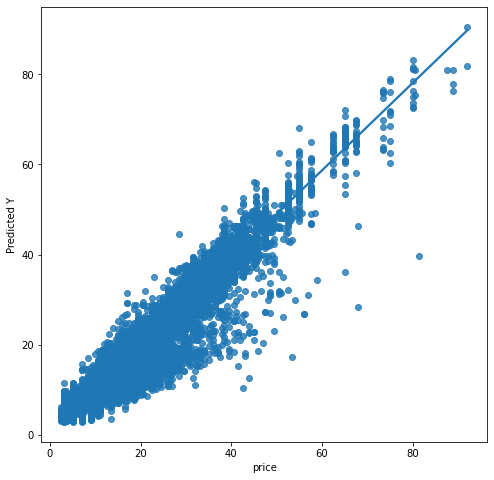

In [72]:
#sns.regplot(y_test,predictions_RF)
plt.subplots(figsize=(8,8))
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
sns.regplot(y_test,predictions_RF)

In [73]:
print('MAE :'," ", mean_absolute_error(y_test,predictions_RF))
print('MSE :'," ", mean_squared_error(y_test,predictions_RF))
print('RMAE :'," ", np.sqrt(mean_squared_error(y_test,predictions_RF)))

MAE :   0.9863624137557826
MSE :   2.748677540277088
RMAE :   1.65791361061941


C:\Users\HBK\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

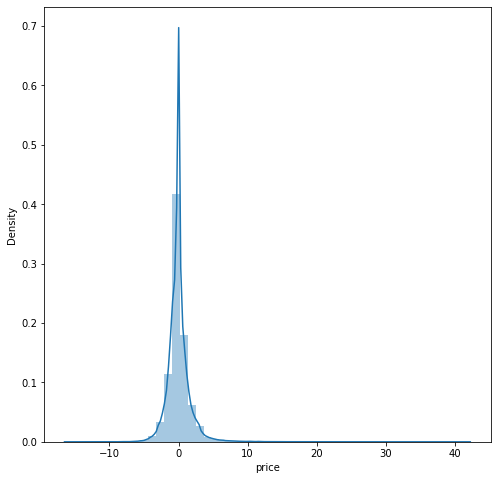

In [74]:
plt.subplots(figsize=(8,8))
sns.distplot(y_test - predictions_RF,bins=50)

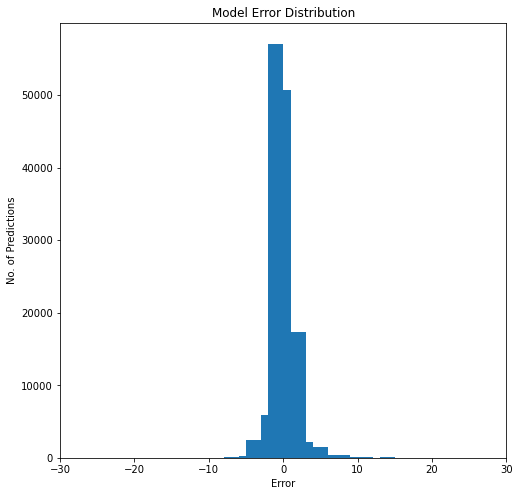

In [75]:
error = y_test - predictions_RF
#Set plot size
plt.subplots(figsize=(8,8))
#Set X-Axis range
plt.xlim(-30, 30)
plt.title('Model Error Distribution')
plt.ylabel('No. of Predictions')
plt.xlabel('Error')
plt.hist(error, bins=np.linspace(-30, 30, num=41, dtype=int));
plt.show()

### Gradient Boosting Regressor

In [76]:
predictions_clf = clf.predict(x_test)
print('MAE :'," ", mean_absolute_error(y_test,predictions_clf))
print('MSE :'," ", mean_squared_error(y_test,predictions_clf))
print('RMAE :'," ", np.sqrt(mean_squared_error(y_test,predictions_clf)))

MAE :   1.004513466400507
MSE :   2.539213302591894
RMAE :   1.5934909170095366


C:\Users\HBK\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

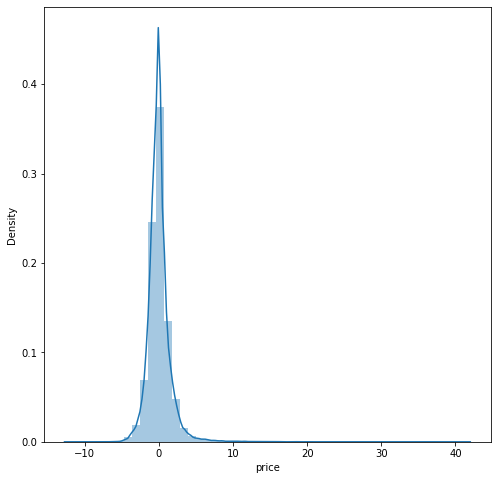

In [77]:
plt.subplots(figsize=(8,8))
sns.distplot(y_test - predictions_clf,bins=50)

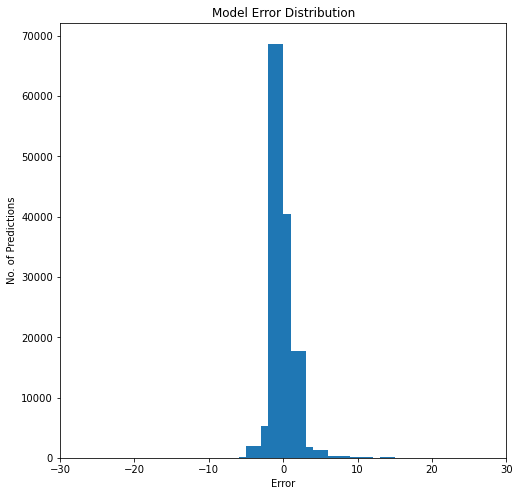

In [78]:
error = y_test - predictions_clf 
#Set plot size
plt.subplots(figsize=(8,8))
#Set X-Axis range
plt.xlim(-30, 30)
plt.title('Model Error Distribution')
plt.ylabel('No. of Predictions')
plt.xlabel('Error')
plt.hist(error, bins=np.linspace(-30, 30, num=41, dtype=int));
plt.show()

In [79]:
def predict_price(name,source,surge_multiplier,icon):    
    loc_index = np.where(new_data.columns==name)[0]

    x = np.zeros(len(new_data.columns))
    x[0] = source
    x[1] = surge_multiplier
    x[2] = icon
    if loc_index >= 0:
        x[loc_index] = 1

    return random.predict([x])[0], clf.predict([x])[0]

In [80]:
pred_random, pred_clf = random.predict(x_test), clf.predict(x_test)

#### Follow these instructions before predicting the price:
* For cab_name: Black SUV --> 0 , Lux --> 1 , Shared --> 2 , Taxi --> 3 , UberPool --> 4 , UberX --> 5

* For Source: Back Bay --> 0 , Beacon Hill --> 1 , Boston University --> 2 , Fenway --> 3 , Financial District --> 4 , Haymarket Square --> 5 , North End --> 6 , North Station --> 7 , Northeastern University --> 8 , South Station --> 9 , Theatre District --> 10 , West End --> 11

* For Surge_multiplier : Enter Surge Multiplier value from 0 to 4

* For Icon: clear-day --> 0 , clear-night --> 1 , cloudy --> 2 , fog --> 3 , partly-cloudy-day --> 4 , partly-cloudy-night --> 5 , rain --> 6

#### predict_price(cab_name , source , surge_multiplier , icon)

In [81]:
predict_price(4 , 3, 2, 0)

C:\Users\HBK\AppData\Local\Temp\ipykernel_21188\537211557.py:8: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if loc_index >= 0:
C:\Users\HBK\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\HBK\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


(15.080654761904764, 15.179522121596623)